# Visualization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Heatmaps by topic
### Rearranging dataframe

In [2]:
topic_by_year_df = pd.read_csv('data/topic_by_year_df.csv')

In [3]:
topic_by_year_df.head()

,year,topic_id,counts,topic_name
0,2020,10,585,Social Media & Fake News
1,2020,12,508,Freedom of Press
2,2020,6,206,Journalism Awards
3,2020,13,173,Union Issues
4,2020,9,140,Major National Newspapers


In [4]:
time_df = pd.DataFrame(topic_by_year_df.groupby(['topic_name','year']).counts.max().unstack(fill_value=0))
time_df.head()

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
topic_name,,,,,,,,,,,,,,,,,,,,,
Circulation & Distribution,17,72,80,54,37,40,95,136,155,235,...,331,238,63,135,154,166,172,124,136,109
Editorial Cartoons,1,10,4,5,2,3,8,14,39,126,...,36,23,6,8,12,6,6,9,11,5
Exec Newspeople,12,34,35,19,17,31,125,89,79,96,...,150,176,106,122,177,206,258,205,206,111
Freedom of Press,20,59,54,46,17,18,41,38,56,136,...,190,104,21,178,260,343,341,392,548,508
Journalism Awards,12,30,26,23,12,18,50,42,46,90,...,168,154,45,145,179,197,259,223,291,206


In [5]:
time_df.to_csv('data/time')

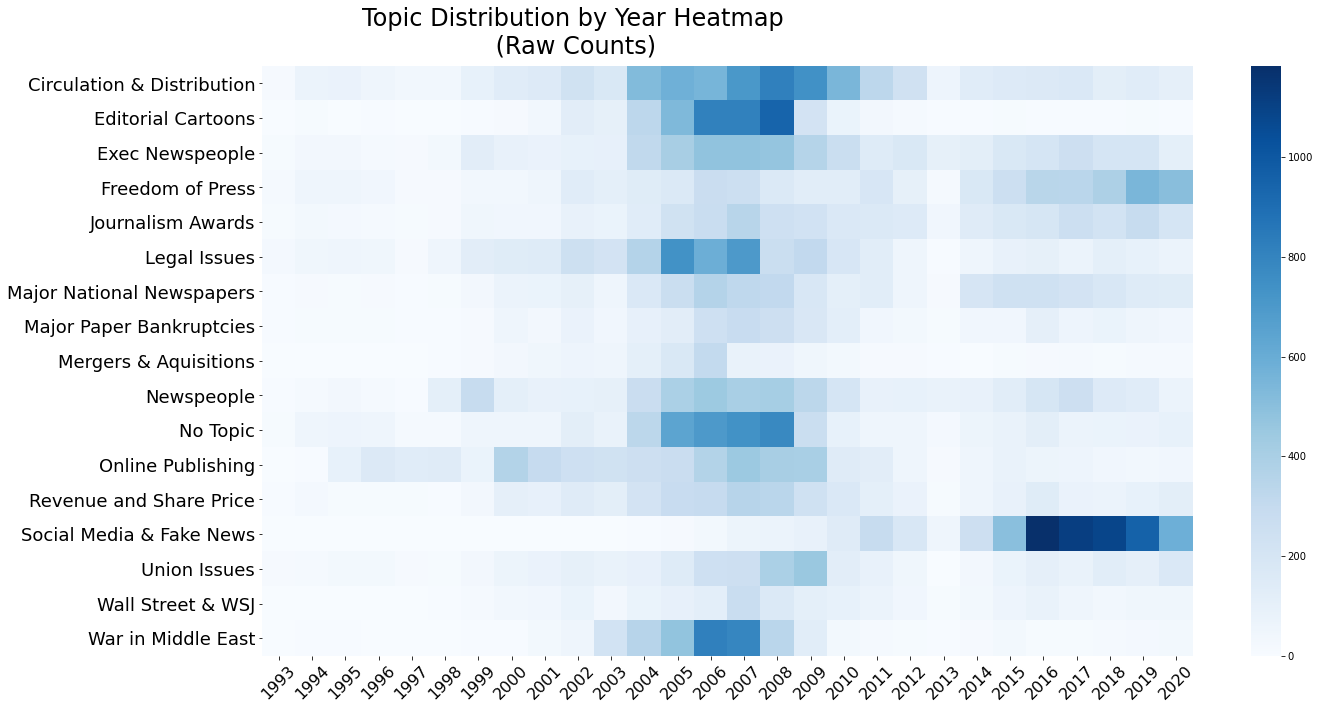

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(time_df,cmap='Blues')
plt.xticks(size=16,rotation=45)
plt.yticks(size=18)
plt.xlabel('')
plt.ylabel('')
plt.suptitle('Topic Distribution by Year Heatmap\n (Raw Counts)', size=24, x=0.4)
plt.tight_layout()
plt.savefig('viz/heatmap0.svg');

Heatmap doesn't really do a good job comparing topic distribution across years in this state.

In [8]:
doc_totals = [time_df.iloc[:,x].sum() for x in range(len(time_df.columns))]
years = [x for x in range(len(time_df.columns))]


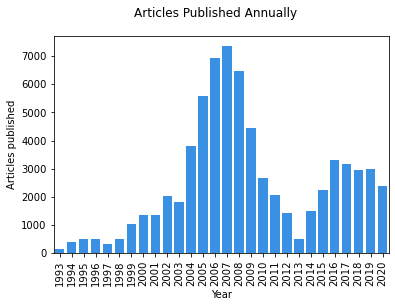

In [9]:
sns.barplot(time_df.columns, doc_totals, color='dodgerblue')
plt.suptitle('Articles Published Annually')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Articles published')
plt.savefig('viz/annual_articles.svg');

### Normalizing data by row

Total articles per year grew consistently over the decades, so I normalized each topic/year value by year (% of article that year that were each topic) in order to more meaningfully compare topic distribution across years.

In [10]:
time_df2 = time_df[:]

In [11]:
for x in range(len(time_df2.columns)):
    col_sum = time_df2.iloc[:,x].sum()    
    for idx, val in enumerate(time_df2.iloc[:,x]):
        time_df2.iloc[idx,x] = val / col_sum

In [12]:
time_df2.to_csv('data/time_df_norm.csv')

In [13]:
time_df2

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
topic_name,,,,,,,,,,,,,,,,,,,,,
Circulation & Distribution,0.120567,0.173913,0.154143,0.105263,0.117834,0.080483,0.092323,0.099125,0.112809,0.115707,...,0.160914,0.165508,0.126761,0.090665,0.069089,0.050136,0.054569,0.041934,0.045348,0.045721
Editorial Cartoons,0.007092,0.024155,0.007707,0.009747,0.006369,0.006036,0.007775,0.010204,0.028384,0.062038,...,0.017501,0.015994,0.012072,0.005373,0.005384,0.001812,0.001904,0.003044,0.003668,0.002097
Exec Newspeople,0.085106,0.082126,0.067437,0.037037,0.054140,0.062374,0.121477,0.064869,0.057496,0.047267,...,0.072922,0.122392,0.213280,0.081934,0.079408,0.062217,0.081853,0.069327,0.068690,0.046560
Freedom of Press,0.141844,0.142512,0.104046,0.089669,0.054140,0.036217,0.039845,0.027697,0.040757,0.066962,...,0.092368,0.072323,0.042254,0.119543,0.116644,0.103594,0.108185,0.132567,0.182728,0.213087
Journalism Awards,0.085106,0.072464,0.050096,0.044834,0.038217,0.036217,0.048591,0.030612,0.033479,0.044313,...,0.081672,0.107093,0.090543,0.097381,0.080305,0.059499,0.082170,0.075414,0.097032,0.086409
Legal Issues,0.177305,0.113527,0.102119,0.097466,0.057325,0.104628,0.125364,0.101312,0.108443,0.123584,...,0.063199,0.041725,0.016097,0.034923,0.039928,0.031410,0.022843,0.037538,0.032011,0.030201
Major National Newspapers,0.042553,0.033816,0.023121,0.027290,0.015924,0.024145,0.032070,0.051749,0.053857,0.051206,...,0.065143,0.040334,0.030181,0.134318,0.109017,0.073694,0.069480,0.062902,0.049350,0.058725
Major Paper Bankruptcies,0.035461,0.024155,0.019268,0.023392,0.028662,0.010060,0.014577,0.037901,0.025473,0.039882,...,0.021877,0.020862,0.024145,0.028878,0.019740,0.033223,0.019670,0.025702,0.017339,0.018037
Mergers & Aquisitions,0.000000,0.004831,0.007707,0.005848,0.012739,0.012072,0.016521,0.024781,0.034207,0.030034,...,0.007778,0.009736,0.010060,0.002686,0.005832,0.005436,0.006662,0.003720,0.006669,0.009228


''

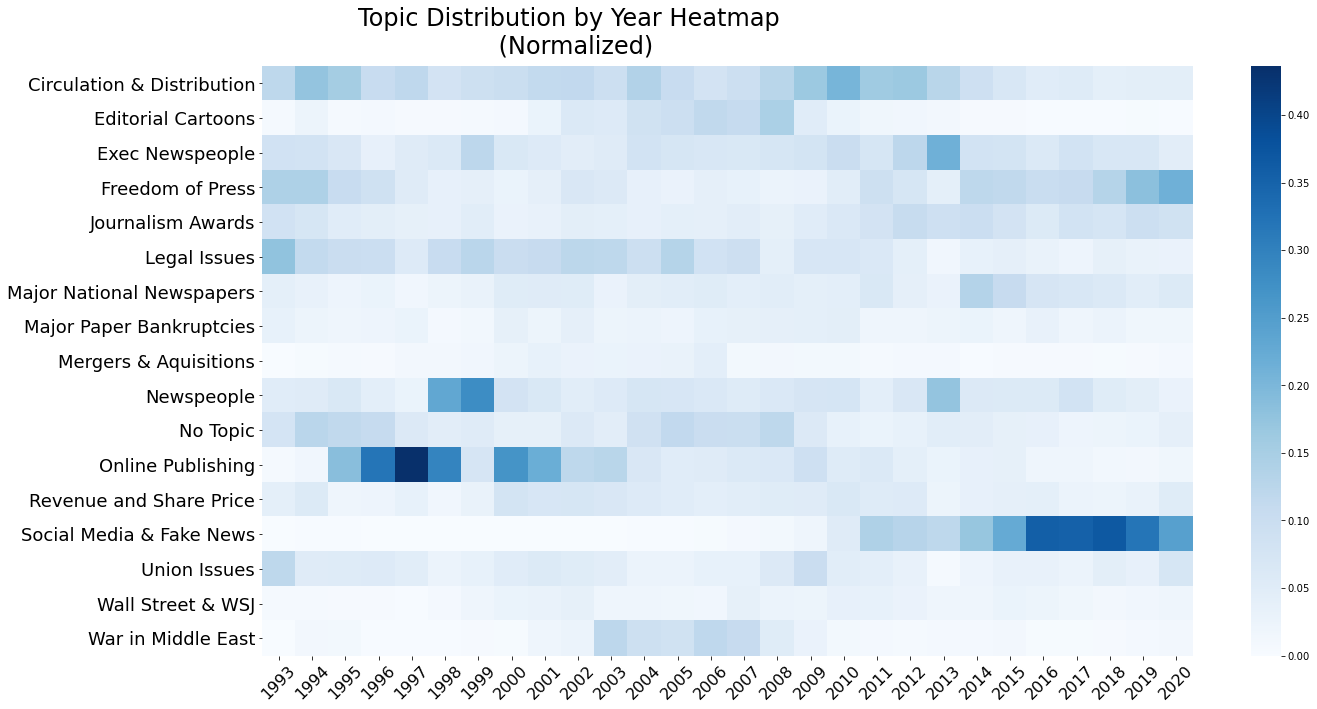

In [16]:
# all relevant topics in heatmap

plt.figure(figsize=(20,10))
sns.heatmap(time_df2,
            cmap='Blues',
            #vmin=0, vmax=0.25
           )
plt.xticks(size=16,rotation=45)
plt.yticks(size=18)
plt.xlabel('')
plt.ylabel('')
plt.suptitle('Topic Distribution by Year Heatmap \n (Normalized)', size=24, x=0.4)
plt.tight_layout()
plt.savefig('viz/heatmap1.svg')
;

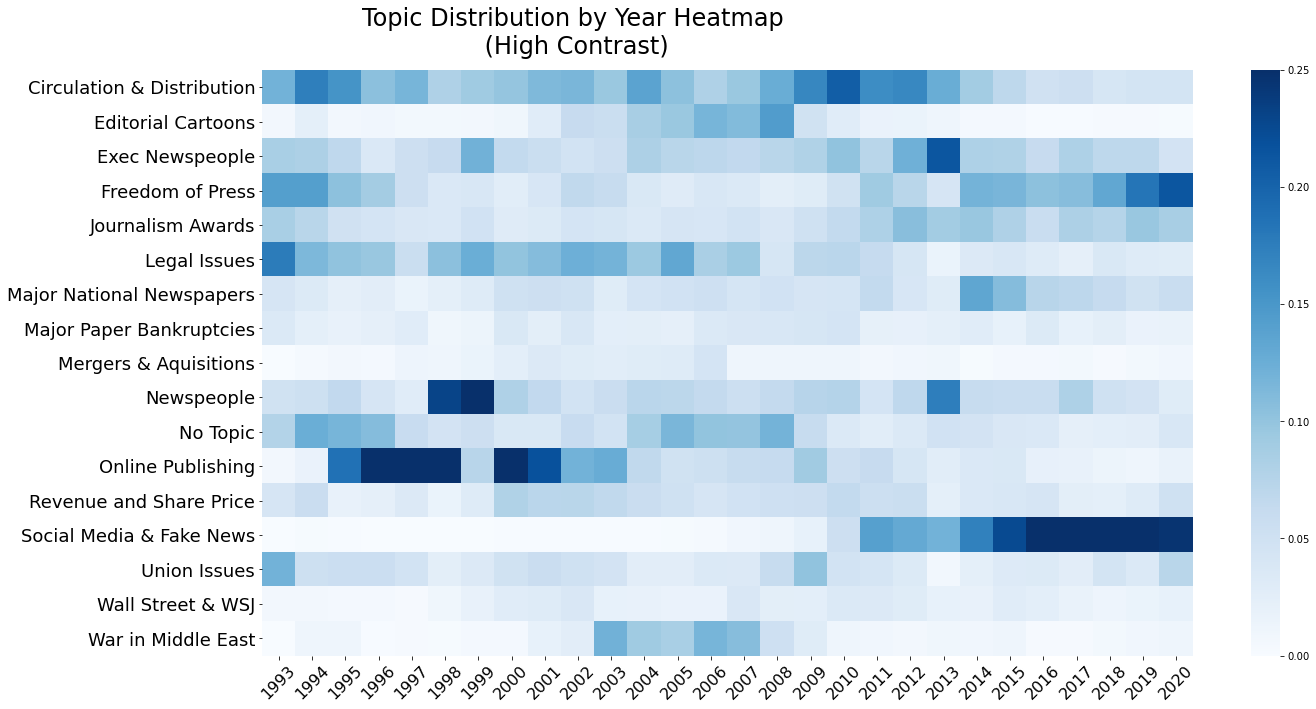

In [15]:
# all relevant topics in heatmap

plt.figure(figsize=(20,10))
sns.heatmap(time_df2,
            cmap='Blues',
            vmin=0, vmax=0.25
           )
plt.xticks(size=16,rotation=45)
plt.yticks(size=18)
plt.xlabel('')
plt.ylabel('')
plt.suptitle('Topic Distribution by Year Heatmap\n (High Contrast)', size=24, x=0.4)
plt.tight_layout()
plt.savefig('viz/heatmap2.svg');

## Looking at individual articles in each topic


In [229]:
df_merged = pd.read_csv('data/all_articles_topics.csv')

/Users/max/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [230]:
df_merged.drop('Unnamed: 0', axis=1, inplace=True)

In [231]:
df_merged[df_merged.best_match_topic == 2].sample(5)

,title,pub_date,author,source,body_text,url,body_text_clean,full_text_clean,tokens,stemmed,...,Major National Newspapers,Social Media & Fake News,Legal Issues,Freedom of Press,Union Issues,Wall Street & WSJ,Circulation & Distribution,Mergers & Aquisitions,best_match_topic,year
36524,Tribune Spending $500M to Reduce Loans,2007-12-06,E&P Staff,NaN,E&P StaffBy: Media conglomerate Tribune Co...,http://www.editorandpublisher.com//stories/tri...,Media conglomerate Tribune Co. said Thurs...,media conglomerate tribune co said thursd...,media conglomerate tribune co said thursday it...,media conglomer tribun co said thursday it pla...,...,0.00033,0.00230,0.00311,0.00000,0.01838,0.00487,0.00000,0.00585,2,2007
40245,Worker Killed In 'Chicago Tribune' Plant Accident,2007-05-27,E&P Staff,NaN,E&P StaffBy: E&P Staff A contract worker wa...,http://www.editorandpublisher.com//stories/wor...,A contract worker was cut in half in a co...,a contract worker was cut in half in a co...,a contract worker was cut in half in a conveyo...,a contract worker wa cut in half in a conveyor...,...,0.00000,0.00000,0.00511,0.01691,0.00766,0.00000,0.00523,0.00000,2,2007
34212,TMN Nets Sears Promo,2008-04-08,E&P Staff,NaN,E&P StaffBy: E&P Staff Tribune's national a...,http://www.editorandpublisher.com//stories/tmn...,"Tribune's national advertising sales arm,...",tribunes national advertising sales arm t...,tribunes national advertising sales arm tribun...,tribun nation advertis sale arm tribun media n...,...,0.01235,0.00000,0.00000,0.00000,0.00000,0.00000,0.00851,0.00000,2,2008
24955,"Narrower, Shallower 'Chicago Tribune' Debuts",2010-02-08,E&P Staff,NaN,E&P StaffBy: E&P Staff The Chicago Tribune ...,http://www.editorandpublisher.com//stories/nar...,The Chicago Tribune debuted its narrower ...,the chicago tribune debuted its narrower ...,the chicago tribune debuted its narrower broad...,the chicago tribun debut it narrow broadsheet ...,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.02133,0.00000,2,2010
47710,Columnist Pitts' Book to Be Reissued This Week,2006-05-30,E&P Staff,NaN,"E&P StaffBy: E&P Staff ""Becoming Dad"" by co...",http://www.editorandpublisher.com//stories/col...,"""Becoming Dad"" by columnist Leonard Pitts...",becoming dad by columnist leonard pitts j...,becoming dad by columnist leonard pitts jr wil...,becom dad by columnist leonard pitt jr will be...,...,0.00404,0.00067,0.00000,0.00000,0.00000,0.00000,0.00000,0.00088,2,2006


## Export for tableau

In [43]:
time_df2 = pd.read_csv('data/time_df_norm.csv')

In [44]:
df2 = time_df2.T.reset_index() #transpose
df2.columns = df2.iloc[0] #set topics as column headers
df2.rename(columns={"topic_name": "year"}, inplace= True) #replace 1 col name
df2 = df2.iloc[1:] #remove first row which has column headers
col = df2.columns[1:] # gets all of the columns you want to melt
df2 = df2.melt(id_vars=['year'], value_vars = col, var_name='topic')

In [45]:
df2.columns

Index(['year', 'topic', 'value'], dtype='object')

In [46]:
# adding col to join to doc_topic matrix later

df2['topic_year'] = (df2.topic + df2.year.astype(str))

In [47]:
df2.to_csv('data/tableau_topic_dist.csv')

## TSNE

In [235]:
from sklearn.manifold import TSNE
from itertools import cycle

In [236]:
doc_topic = pd.read_csv('data/doc_topic.csv')

### Entire dataset

In [271]:
sample1 = doc_topic.drop(['title'], axis=1)
topic_designation1 = sample1.best_match_topic
x_sample1 = sample1.drop('best_match_topic', axis=1)

model1 = TSNE(n_components=2, 
             random_state=0,
             verbose=0,
             metric='cosine') # must be cosine!

low_data1 = model.fit_transform(x_sample1)

In [272]:
colors = cycle(['r',
       'g',
       'b',
       'c',
       'm',
       'y',
       'orange',
       'k',
       'aqua',
       'yellow',
       'purple',
       'slategrey',
       'chartreuse',
       'chocolate',
       'darkslategrey',
       'maroon',
       'midnightblue'])

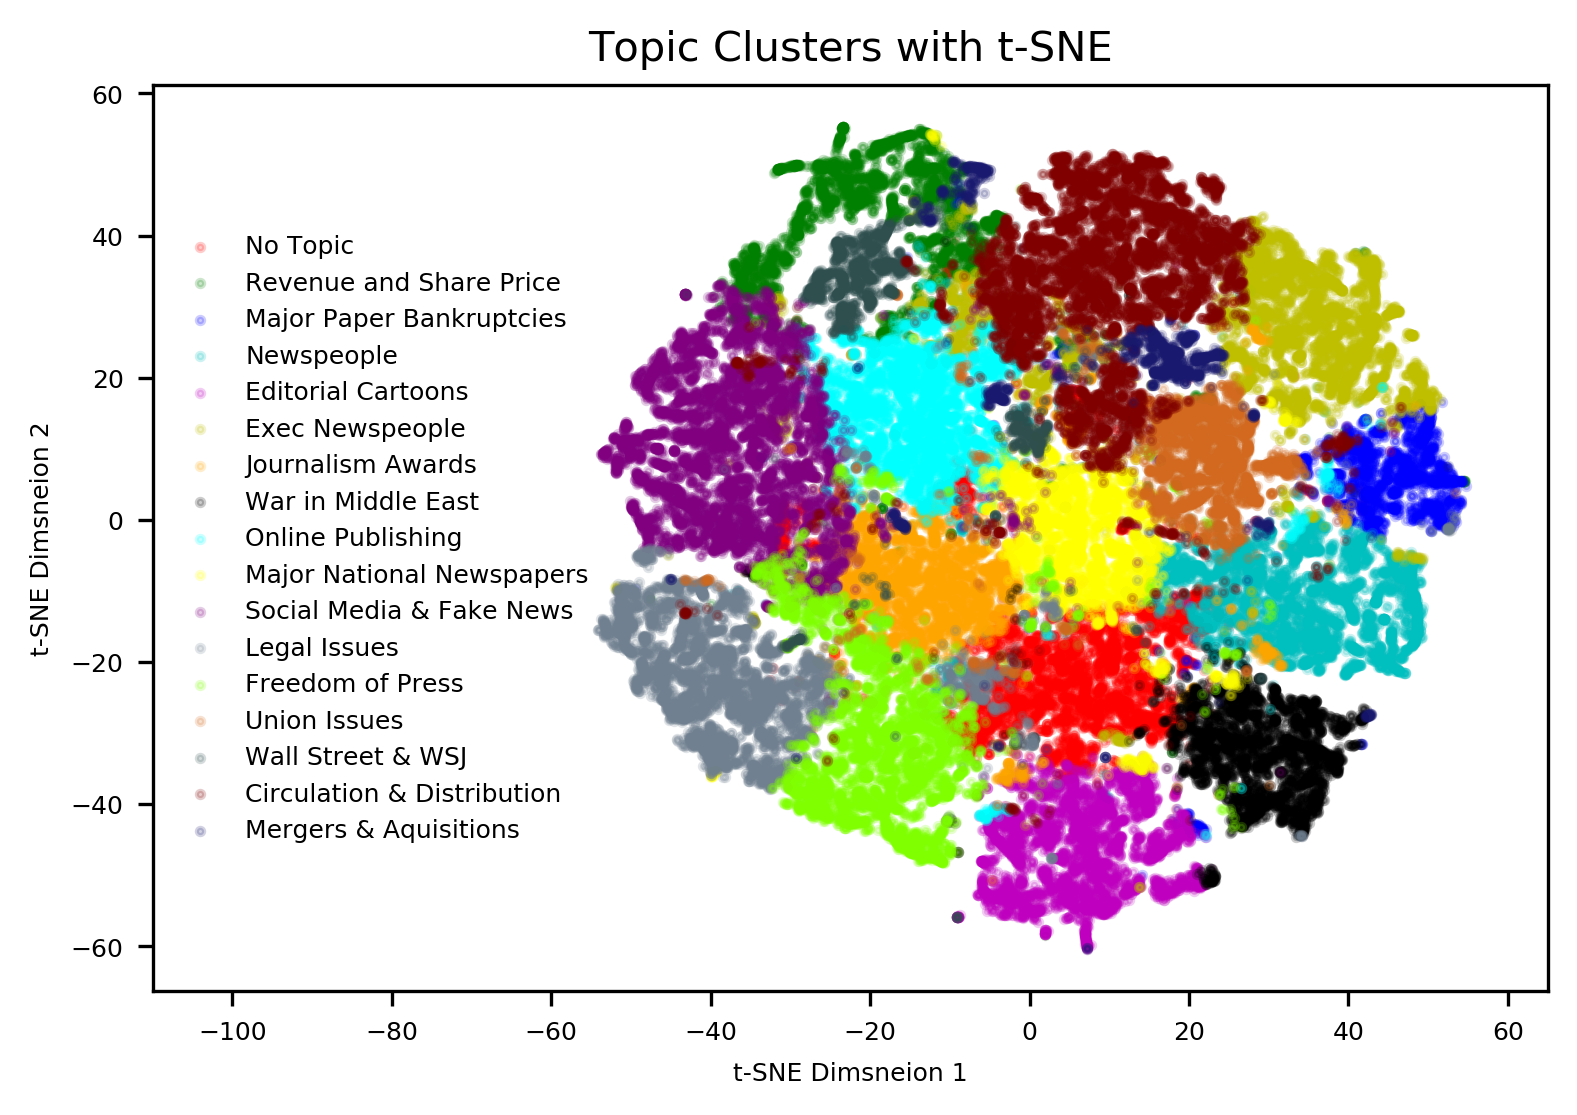

In [306]:
topic_names = list(x_sample1.columns)
topic_ids = range(len(topic_names))

plt.figure(dpi=300)

for i, c, label in zip(topic_ids, colors, topic_names):
    plt.scatter(low_data1[np.where(topic_designation1 == i, True, False)][:,0], 
                low_data1[np.where(topic_designation1 == i, True, False)][:,1], 
                c=c, 
                label=label, 
                s=3, 
                alpha=0.2
               )
    
plt.legend(fontsize=6, 
           loc='center left', 
           frameon=False,
          )

plt.xlim(-110,65)

plt.title("Topic Clusters with t-SNE", fontsize=10)
plt.ylabel("t-SNE Dimsneion 2", fontsize=6)
plt.xlabel("t-SNE Dimsneion 1", fontsize=6);
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

plt.savefig('viz/tsne.svg');

### Sample of 20,000

In [274]:
sample2 = doc_topic.drop(['title'], axis=1).sample(20000)
topic_designation2 = sample2.best_match_topic
x_sample2 = sample2.drop('best_match_topic', axis=1)

In [275]:
model2 = TSNE(n_components=2, 
             random_state=0,
             verbose=0,
             metric='cosine') # must be cosine!

low_data2 = model.fit_transform(x_sample2)

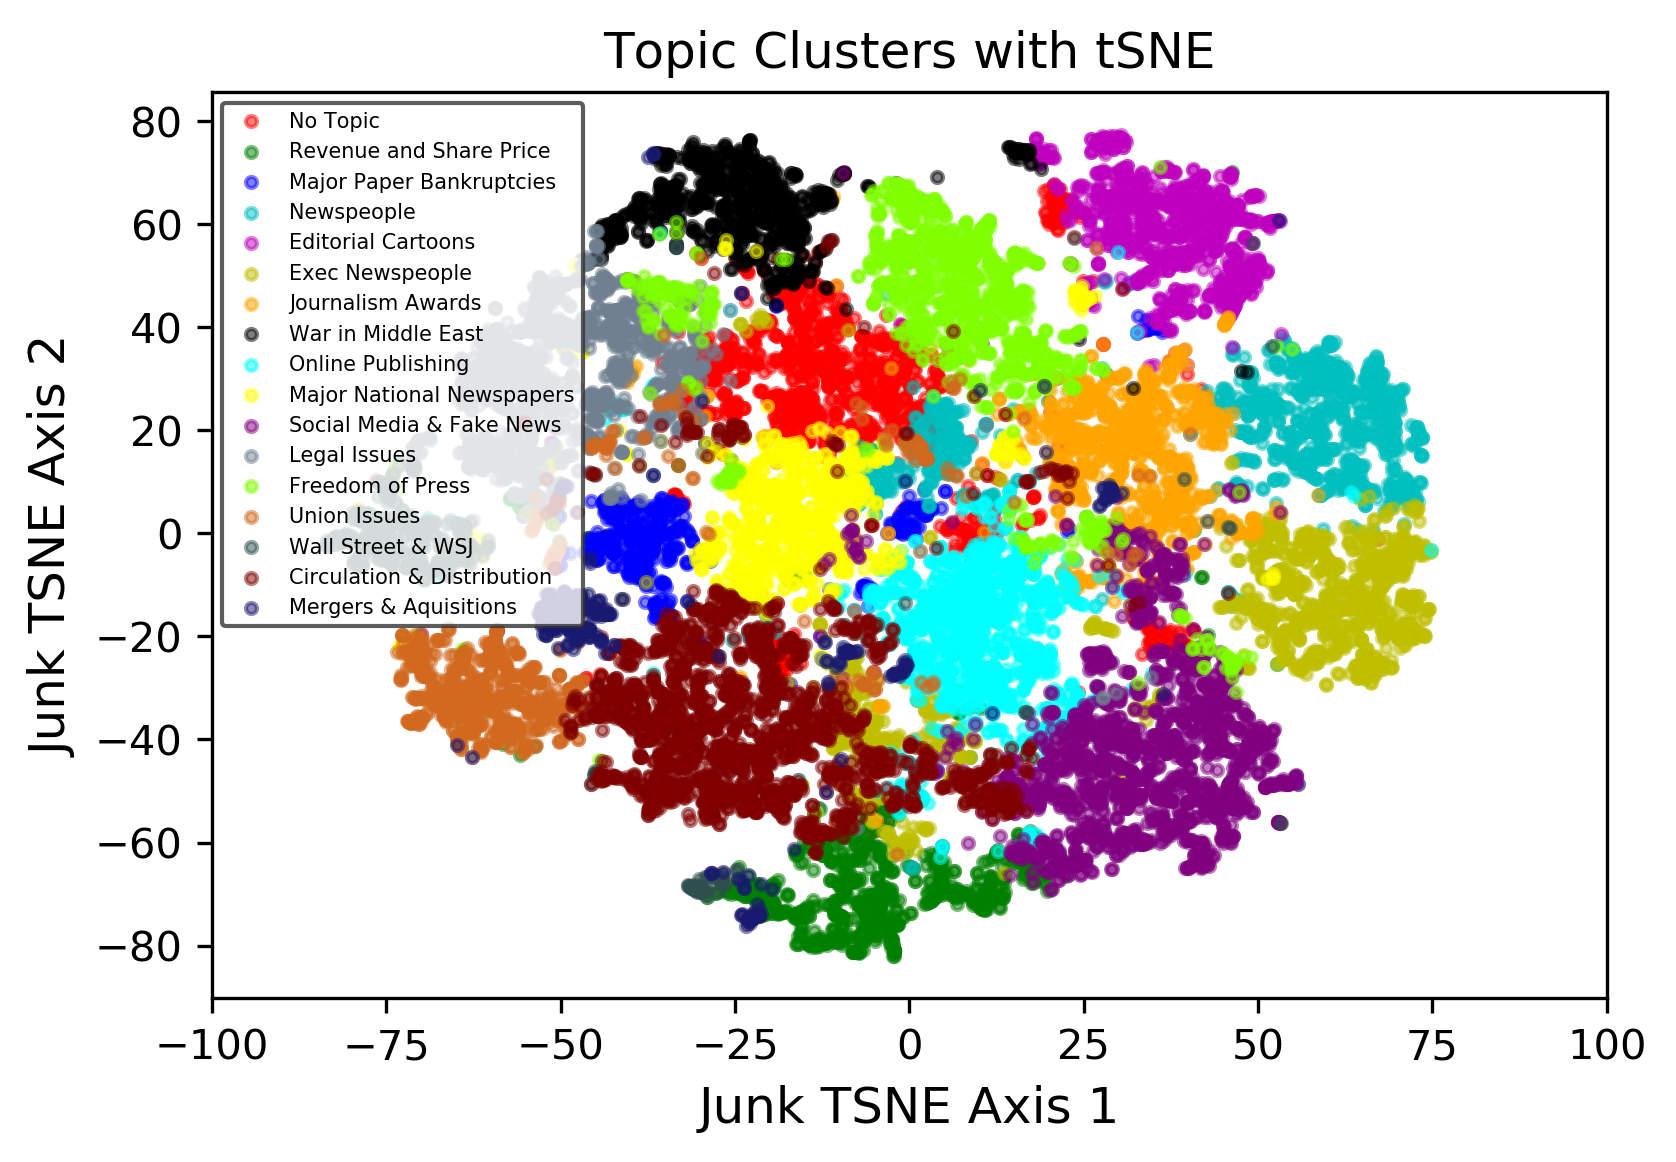

In [276]:
topic_names = list(x_sample2.columns)
topic_ids = range(len(topic_names))

plt.figure(dpi=300)

for i, c, label in zip(topic_ids, colors, topic_names):
    plt.scatter(low_data2[np.where(topic_designation2 == i, True, False)][:,0], 
                low_data2[np.where(topic_designation2 == i, True, False)][:,1], 
                c=c, 
                label=label, 
                s=7, 
                alpha=.5)
    
plt.legend(fontsize=5, 
           loc='upper left', 
           frameon=True, 
           facecolor='#FFFFFF', 
           edgecolor='#333333')

plt.xlim(-100,100);

plt.title("Topic Clusters with tSNE", fontsize=12)
plt.ylabel("Junk TSNE Axis 2", fontsize=12)
plt.xlabel("Junk TSNE Axis 1", fontsize=12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

## Headline snippits for Tableau)

In [ ]:
df = pd.read_csv('data/all_articles_topics.csv')

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [26]:
# adding actual topic names to df

topic_names = ['No Topic', # topic 0
                'Revenue and Share Price', # topic 1
                'Major Paper Bankruptcies', # topic 2
                'Newspeople', # topic 3
                'Editorial Cartoons', # topic 4
                'Exec Newspeople', # topic 5
                'Journalism Awards', # topic 6
                'War in Middle East', # topic 7
                'Online Publishing', # topic 8
                'Major National Newspapers', # topic 9
                'Social Media & Fake News', # topic 10
                'Legal Issues', # topic 11
                'Freedom of Press', # topic 12
                'Union Issues', # topic 13
                'Wall Street & WSJ', # topic 14
                'Circulation & Distribution', # topic 15
                'Mergers & Aquisitions', # topic 16
]


topic_dict = {}
for idx, name in enumerate(topic_names):
    topic_dict[idx] = name    

In [28]:
sampled_df['topic_name'] = sampled_df.best_match_topic.apply(lambda x: topic_dict[x])

<ipython-input-28-cbb0c177a095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['topic_name'] = sampled_df.best_match_topic.apply(lambda x: topic_dict[x])


In [32]:
df['topic_name'] = df.best_match_topic.apply(lambda x: topic_dict[x])

In [35]:
# adding col to join to time_df matrix later

df['topic_year'] = (df.topic_name + df.year.astype(str))

In [16]:
df.sort_values(by=['best_match_topic','year'], inplace=True)

In [37]:
df.to_csv('data/all_articles_topics.csv')

In [38]:
# new df with only one doc per topic-year

sampled_df = df.groupby(['best_match_topic','year']).head(1)

In [39]:
sampled_df.shape

(469, 31)

In [41]:
sampled_df.to_csv('data/topic_headlines.csv')